In [1]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
data1 = pd.read_csv("SalaryData_Train(1).csv")
data1.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [3]:
data2 = pd.read_csv("SalaryData_Test(1).csv")
data2.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [4]:
data1.shape

(30161, 14)

In [5]:
data2.shape

(15060, 14)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
#Converting test dataset into numeric values
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [9]:
data1['workclass']= label_encoder.fit_transform(data1['workclass']) 
data2['workclass']= label_encoder.fit_transform(data2['workclass']) 

In [10]:
data1['education']= label_encoder.fit_transform(data1['education']) 
data2['education']= label_encoder.fit_transform(data2['education']) 

In [11]:
data1['maritalstatus']= label_encoder.fit_transform(data1['maritalstatus']) 
data2['maritalstatus']= label_encoder.fit_transform(data2['maritalstatus']) 

In [12]:
data1['occupation']= label_encoder.fit_transform(data1['occupation']) 
data2['occupation']= label_encoder.fit_transform(data2['occupation']) 

In [13]:
data1['relationship']= label_encoder.fit_transform(data1['relationship']) 
data2['relationship']= label_encoder.fit_transform(data2['relationship']) 

In [14]:
data1['race']= label_encoder.fit_transform(data1['race']) 
data2['race']= label_encoder.fit_transform(data2['race']) 

In [15]:
data1['sex']= label_encoder.fit_transform(data1['sex']) 
data2['sex']= label_encoder.fit_transform(data2['sex']) 

In [16]:
data1['native']= label_encoder.fit_transform(data1['native']) 
data2['native']= label_encoder.fit_transform(data2['native']) 

In [17]:
data1['Salary']= label_encoder.fit_transform(data1['Salary']) 
data2['Salary']= label_encoder.fit_transform(data2['Salary']) 

In [18]:
data1=pd.DataFrame(data1)
data1.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0       0  
1       0  
2       0  
3       0  
4       0

In [19]:
data2=pd.DataFrame(data2)
data2.head()

age  workclass  education  educationno  maritalstatus  occupation  \
0   25          2          1            7              4           6   
1   38          2         11            9              2           4   
2   28          1          7           12              2          10   
3   44          2         15           10              2           6   
4   34          2          0            6              4           7   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             3     2    1            0            0            40      37   
1             0     4    1            0            0            50      37   
2             0     4    1            0            0            40      37   
3             0     2    1         7688            0            40      37   
4             1     4    1            0            0            30      37   

   Salary  
0       0  
1       0  
2       1  
3       1  
4       0

In [20]:
corr1 = data1.corr()
corr1

age  workclass  education  educationno  maritalstatus  \
age            1.000000   0.080537  -0.001091     0.043525      -0.276363   
workclass      0.080537   1.000000   0.017864     0.037833      -0.034235   
education     -0.001091   0.017864   1.000000     0.345420      -0.040704   
educationno    0.043525   0.037833   0.345420     1.000000      -0.063419   
maritalstatus -0.276363  -0.034235  -0.040704    -0.063419       1.000000   
occupation    -0.005682   0.015572  -0.038213     0.087717       0.022655   
relationship  -0.246452  -0.067414  -0.012732    -0.091935       0.177955   
race           0.023380   0.044734   0.011139     0.032805      -0.068641   
sex            0.081972   0.074966  -0.027831     0.006155      -0.119774   
capitalgain    0.080152   0.035349   0.030582     0.124416      -0.042414   
capitalloss    0.060278   0.007244   0.014822     0.079691      -0.035385   
hoursperweek   0.101598   0.050723   0.059892     0.152522      -0.189004   
native        -0.001548   0.007598   0.079715     0.092625      -0.026057   
Salary         0.241991   0.018040   0.079013     0.335287      -0.193504   

               occupation  relationship      race       sex  capitalgain  \
age             -0.005682     -0.246452  0.023380  0.081972     0.080152   
workclass        0.015572     -0.067414  0.044734  0.074966     0.035349   
education       -0.038213     -0.012732  0.011139 -0.027831     0.030582   
educationno      0.087717     -0.091935  0.032805  0.006155     0.124416   
maritalstatus    0.022655      0.177955 -0.068641 -0.119774    -0.042414   
occupation       1.000000     -0.053727  0.000717  0.062316     0.022162   
relationship    -0.053727      1.000000 -0.117148 -0.584881    -0.058257   
race             0.000717     -0.117148  1.000000  0.089207     0.014355   
sex              0.062316     -0.584881  0.089207  1.000000     0.048809   
capitalgain      0.022162     -0.058257  0.014355  0.048809     1.000000   
capitalloss      0.014612     -0.063659  0.023461  0.047285    -0.032218   
hoursperweek     0.018365     -0.257850  0.048533  0.231272     0.080431   
native          -0.003298     -0.010661  0.126507  0.000063     0.008513   
Salary           0.051577     -0.250998  0.071666  0.216680     0.221195   

               capitalloss  hoursperweek    native    Salary  
age               0.060278      0.101598 -0.001548  0.241991  
workclass         0.007244      0.050723  0.007598  0.018040  
education         0.014822      0.059892  0.079715  0.079013  
educationno       0.079691      0.152522  0.092625  0.335287  
maritalstatus    -0.035385     -0.189004 -0.026057 -0.193504  
occupation        0.014612      0.018365 -0.003298  0.051577  
relationship     -0.063659     -0.257850 -0.010661 -0.250998  
race              0.023461      0.048533  0.126507  0.071666  
sex               0.047285      0.231272  0.000063  0.216680  
capitalgain      -0.032218      0.080431  0.008513  0.221195  
capitalloss       1.000000      0.052454  0.010193  0.150222  
hoursperweek      0.052454      1.000000  0.008429  0.229480  
native            0.010193      0.008429  1.000000  0.023515  
Salary            0.150222      0.229480  0.023515  1.000000

In [21]:
corr2 = data2.corr()
corr2

age  workclass  education  educationno  maritalstatus  \
age            1.000000   0.096037  -0.007948     0.026123      -0.262577   
workclass      0.096037   1.000000   0.018005     0.046623      -0.031329   
education     -0.007948   0.018005   1.000000     0.351486      -0.043117   
educationno    0.026123   0.046623   0.351486     1.000000      -0.068079   
maritalstatus -0.262577  -0.031329  -0.043117    -0.068079       1.000000   
occupation    -0.002214   0.021271  -0.023999     0.093643       0.003854   
relationship  -0.249701  -0.060235  -0.014227    -0.081413       0.185495   
race           0.024485   0.059749   0.012133     0.029355      -0.073718   
sex            0.082265   0.059161  -0.026978    -0.002052      -0.120374   
capitalgain    0.078760   0.032980   0.028626     0.131750      -0.042405   
capitalloss    0.057745   0.010242   0.020568     0.085817      -0.034073   
hoursperweek   0.102758   0.052614   0.062892     0.133691      -0.171665   
native        -0.005683  -0.003635   0.077065     0.097188      -0.016532   
Salary         0.227469   0.011008   0.085554     0.327813      -0.191058   

               occupation  relationship      race       sex  capitalgain  \
age             -0.002214     -0.249701  0.024485  0.082265     0.078760   
workclass        0.021271     -0.060235  0.059749  0.059161     0.032980   
education       -0.023999     -0.014227  0.012133 -0.026978     0.028626   
educationno      0.093643     -0.081413  0.029355 -0.002052     0.131750   
maritalstatus    0.003854      0.185495 -0.073718 -0.120374    -0.042405   
occupation       1.000000     -0.047381 -0.001561  0.045244     0.014165   
relationship    -0.047381      1.000000 -0.121481 -0.579212    -0.054040   
race            -0.001561     -0.121481  1.000000  0.088450     0.013539   
sex              0.045244     -0.579212  0.088450  1.000000     0.044843   
capitalgain      0.014165     -0.054040  0.013539  0.044843     1.000000   
capitalloss      0.016580     -0.048091  0.015799  0.045360    -0.031876   
hoursperweek     0.011755     -0.261905  0.037125  0.231744     0.090501   
native          -0.001311      0.000500  0.125514 -0.014178     0.005923   
Salary           0.046218     -0.258335  0.069227  0.213863     0.220882   

               capitalloss  hoursperweek    native    Salary  
age               0.057745      0.102758 -0.005683  0.227469  
workclass         0.010242      0.052614 -0.003635  0.011008  
education         0.020568      0.062892  0.077065  0.085554  
educationno       0.085817      0.133691  0.097188  0.327813  
maritalstatus    -0.034073     -0.171665 -0.016532 -0.191058  
occupation        0.016580      0.011755 -0.001311  0.046218  
relationship     -0.048091     -0.261905  0.000500 -0.258335  
race              0.015799      0.037125  0.125514  0.069227  
sex               0.045360      0.231744 -0.014178  0.213863  
capitalgain      -0.031876      0.090501  0.005923  0.220882  
capitalloss       1.000000      0.057712 -0.001008  0.145967  
hoursperweek      0.057712      1.000000  0.005877  0.222665  
native           -0.001008      0.005877  1.000000  0.014056  
Salary            0.145967      0.222665  0.014056  1.000000

<AxesSubplot:>

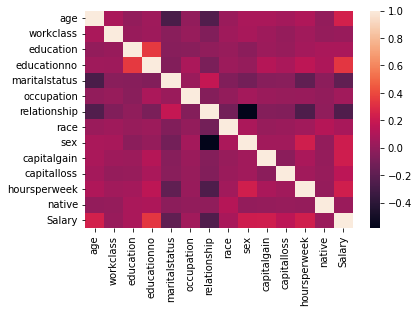

In [22]:
import seaborn as sns 
sns.heatmap(corr1)

<AxesSubplot:>

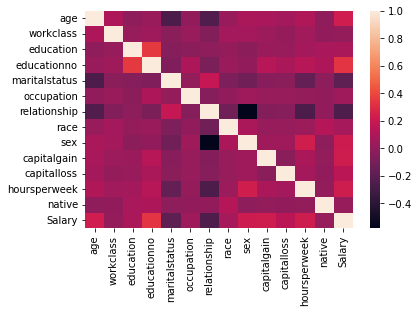

In [23]:
import seaborn as sns 
sns.heatmap(corr2)

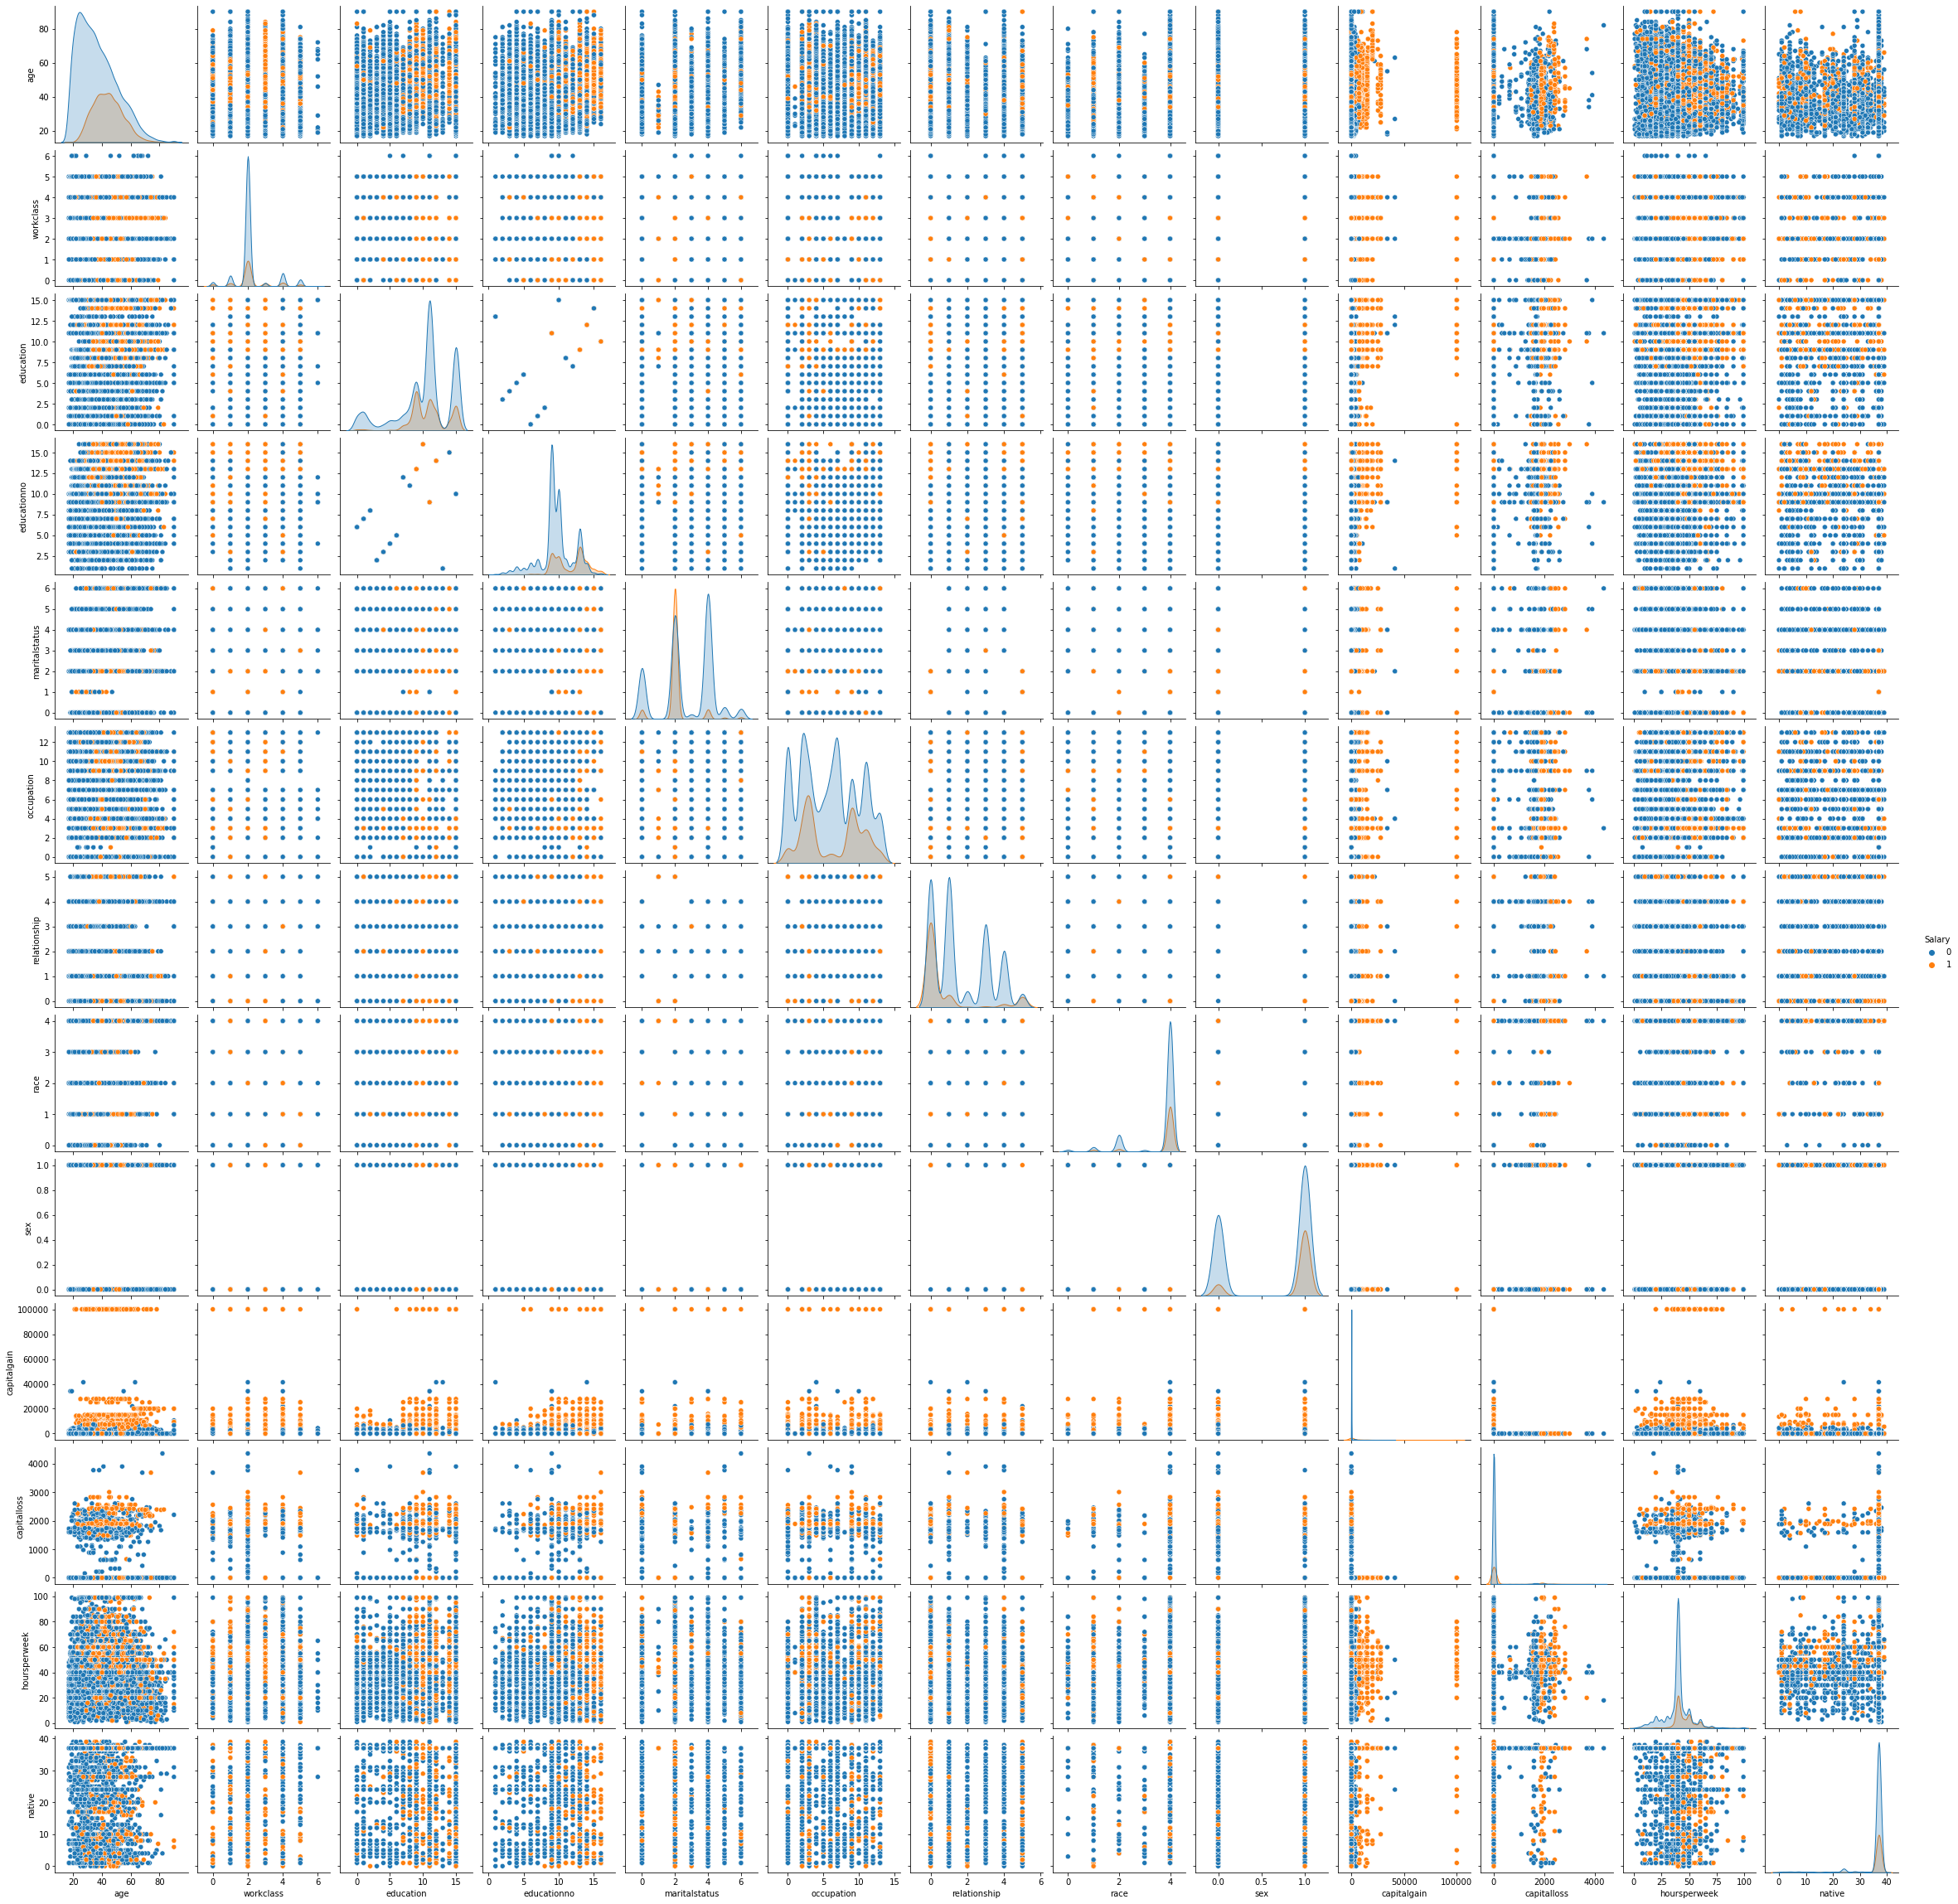

In [24]:
sns.pairplot(data=data1, hue = 'Salary')

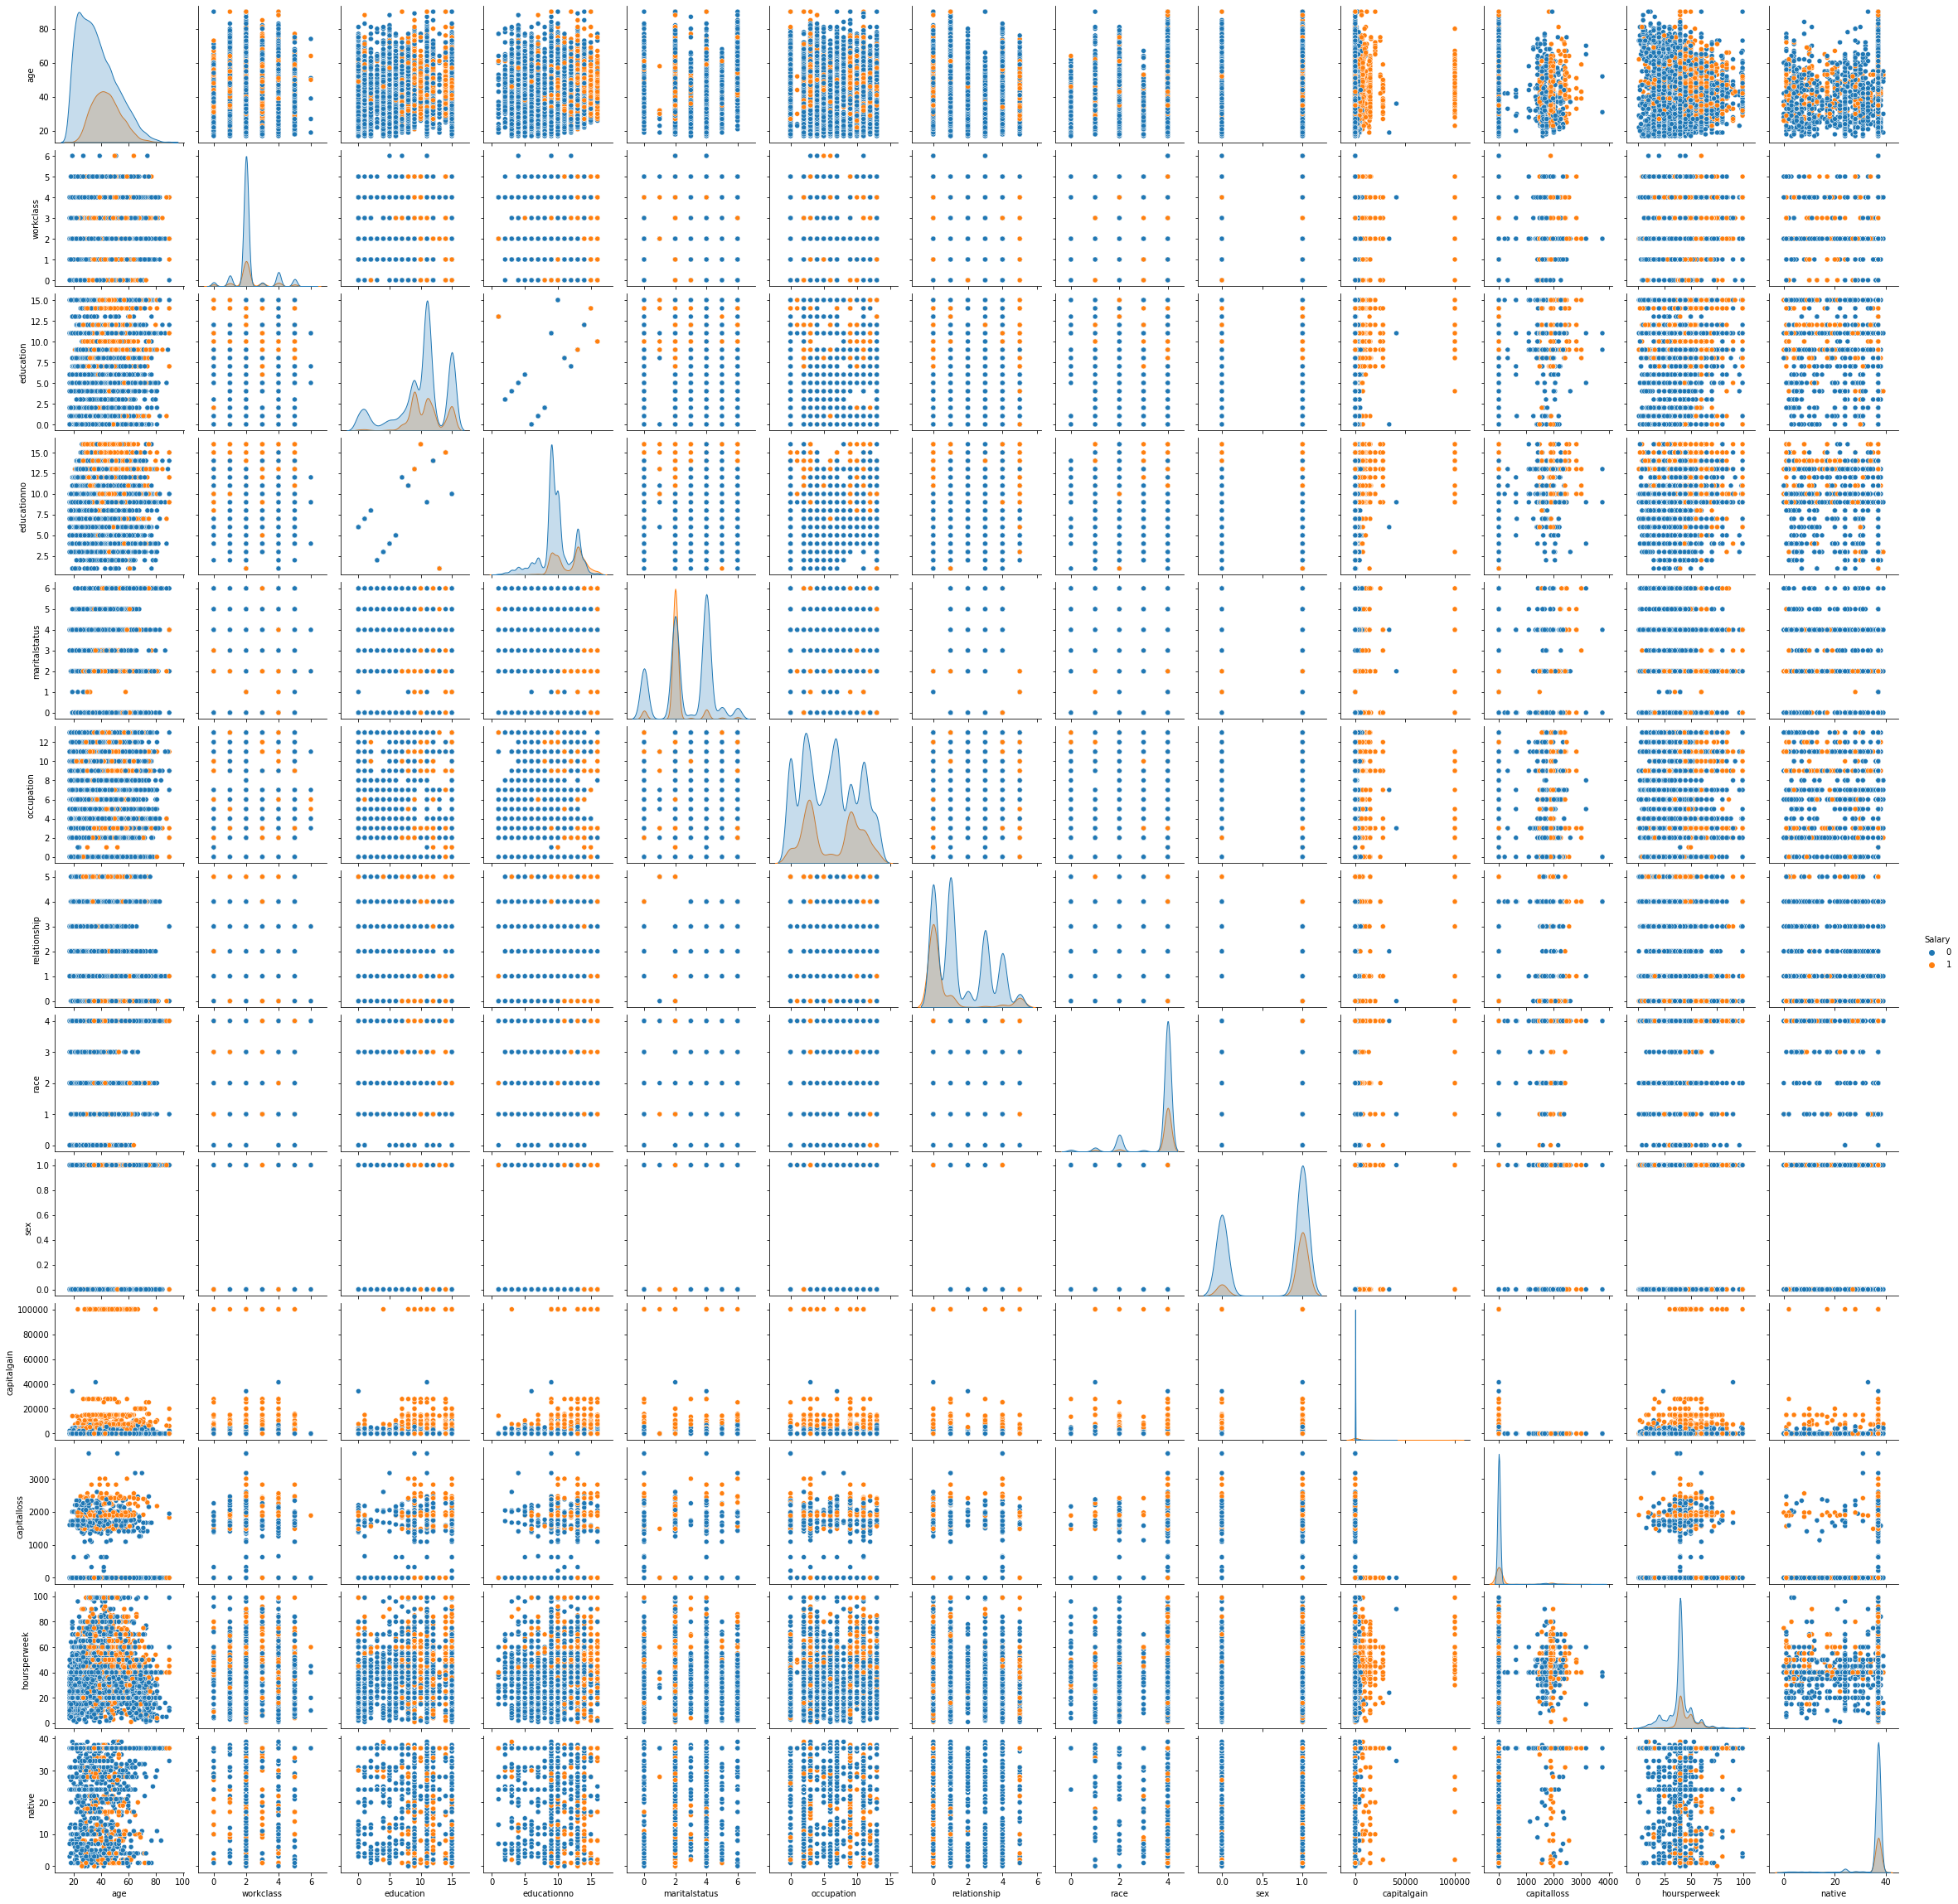

In [25]:
sns.pairplot(data=data2, hue = 'Salary')

# Coverting data into array format for training data

In [26]:
array1 = data1.values

X = array1[:,:13]
Y = array1[:,13]

In [27]:
X

array([[39,  5,  9, ...,  0, 40, 37],
       [50,  4,  9, ...,  0, 13, 37],
       [38,  2, 11, ...,  0, 40, 37],
       ...,
       [58,  2, 11, ...,  0, 40, 37],
       [22,  2, 11, ...,  0, 20, 37],
       [52,  3, 11, ...,  0, 40, 37]], dtype=int64)

In [28]:
Y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [30]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((21112, 13), (21112,), (9049, 13), (9049,))

In [31]:
print("There are {} samples in the training set and {} samples in the test set.".format(X_train.shape[0],X_test.shape[0]))

There are 21112 samples in the training set and 9049 samples in the test set.


# SVM for training data

In [32]:
clf = SVC()
clf.fit(X_train , Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, Y_pred)

Accuracy = 79.54470107194165


array([[6581,  228],
       [1623,  617]], dtype=int64)

In [33]:
print("The accuracy of train data is {:.2f} out of 1".format(clf.score(X_test,Y_test)))

The accuracy of train data is 0.80 out of 1


# Coverting data into array format for test data

In [34]:
array2 = data2.values

x = array2[:,:13]
y = array2[:,13]

In [35]:
x

array([[25,  2,  1, ...,  0, 40, 37],
       [38,  2, 11, ...,  0, 50, 37],
       [28,  1,  7, ...,  0, 40, 37],
       ...,
       [38,  2,  9, ...,  0, 50, 37],
       [44,  2,  9, ...,  0, 40, 37],
       [35,  3,  9, ...,  0, 60, 37]], dtype=int64)

In [36]:
y

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [38]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10542, 13), (10542,), (4518, 13), (4518,))

In [39]:
print("There are {} samples in the training set and {} samples in the test set.".format(x_train.shape[0],x_test.shape[0]))

There are 10542 samples in the training set and 4518 samples in the test set.


# SVM for test data

In [40]:
clf = SVC()
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 79.32713590084109


array([[3256,  102],
       [ 832,  328]], dtype=int64)

In [41]:
print("The accuracy of train data is {:.2f} out of 1".format(clf.score(x_test,y_test)))

The accuracy of train data is 0.79 out of 1
